# Airmiles Analysis

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

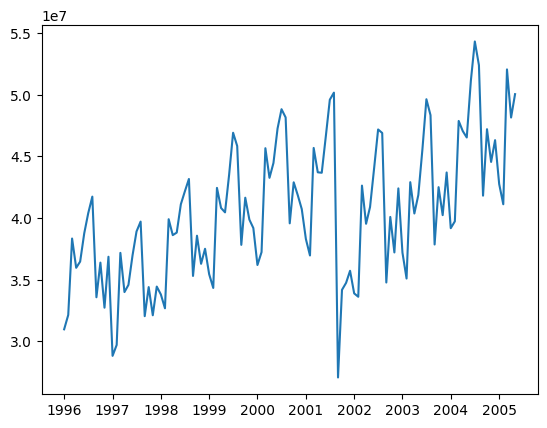

In [22]:
# Load
# df = pd.read_csv('./data/airmiles.csv')

# def switch_day_month(date):
#     day, month, year = date.split('/')
#     return f'{month}/{day}/{year}'

# df["Date"] = df["Date"].apply(switch_day_month)
# df["Date"] = pd.to_datetime(df["Date"])
# df.set_index("Date", inplace=True)
# df = df.asfreq('MS')

df = pd.read_csv('./data/airmiles.csv', index_col='Date', parse_dates=True, dayfirst=True)
df = df.asfreq('MS')

plt.plot(df)
plt.show()

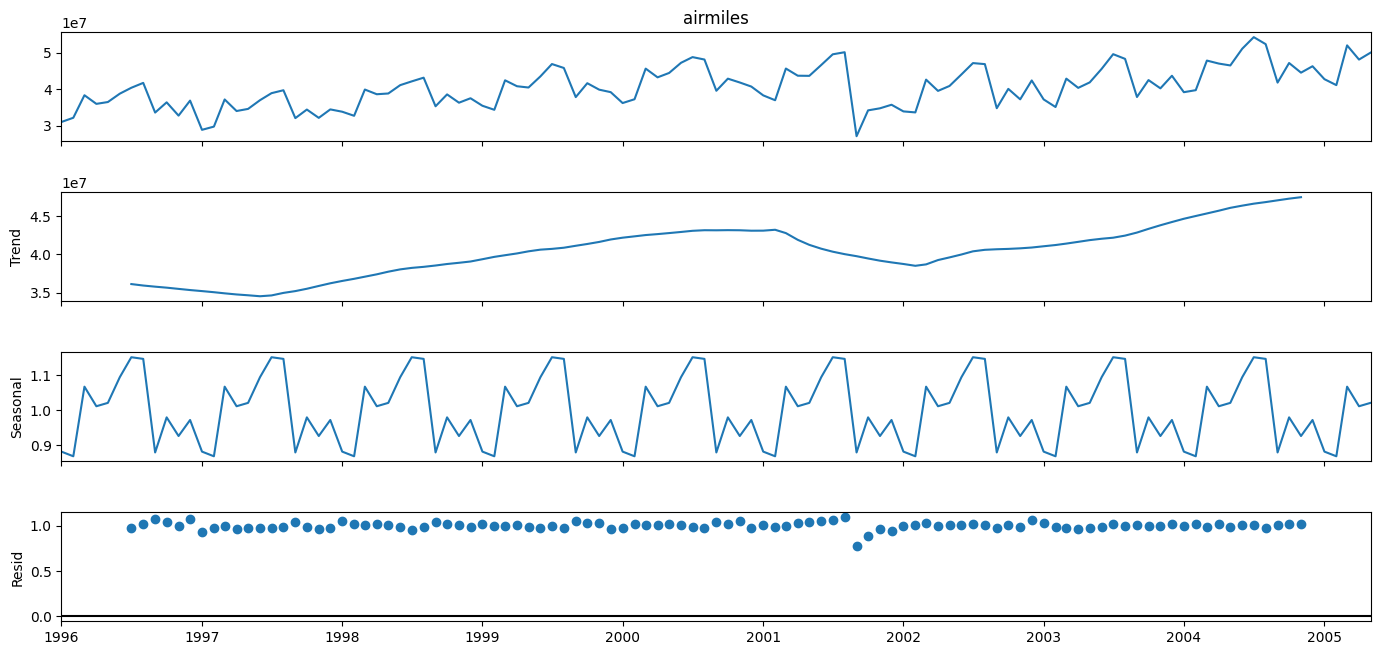

In [23]:
# Check for seasonality
decompositionMul = seasonal_decompose(df["airmiles"], model='multiplicative', period=12)
fig = decompositionMul.plot()
fig.set_size_inches(15, 7)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


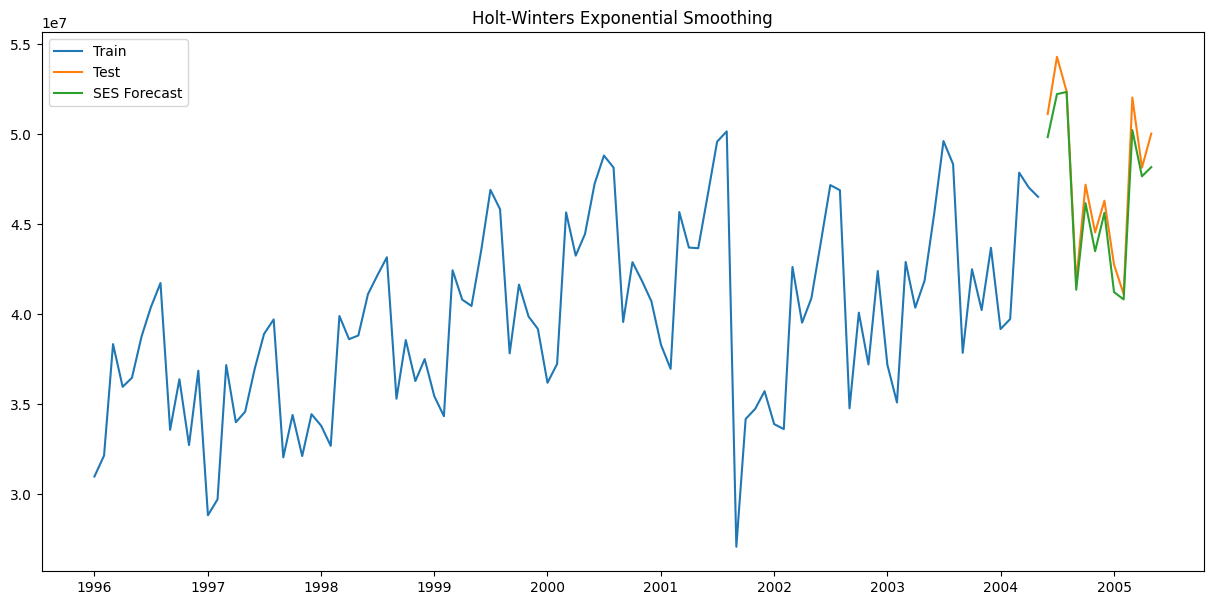

In [24]:
# Train
periods = 12
train = df.iloc[:-periods]
test = df.iloc[-periods:]
from statsmodels.tsa.holtwinters import ExponentialSmoothing
tes_model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
tes_forecast = tes_model.forecast(steps=periods)

plt.figure(figsize=(15, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(tes_forecast.index, tes_forecast, label='SES Forecast')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()


In [25]:
# Evaluate
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def evaluate(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return rmse, mae, mape

rmse, mae, mape = evaluate(test, tes_forecast)
print("Triple Exponential Smoothing Errors: rmse = {}, mae = {}, mape = {}".format(rmse, mae, mape))

Triple Exponential Smoothing Errors: rmse = 1230641.258058291, mae = 1046933.5311963577, mape = 0.021608951696642315


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


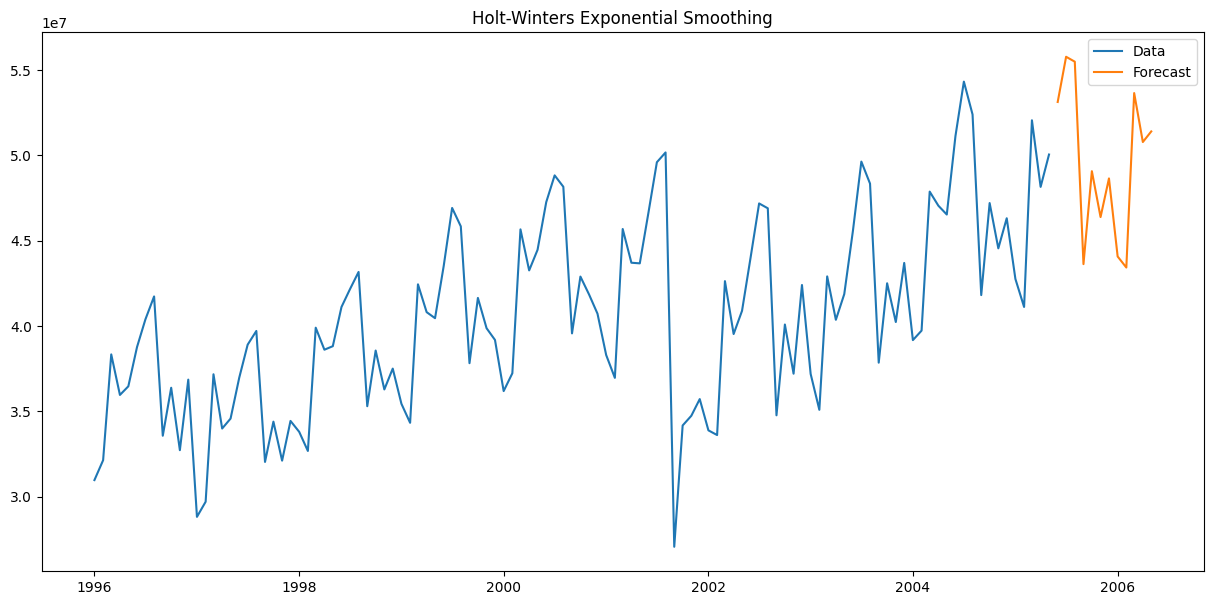

In [26]:
# Predict
tes_model = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=12).fit()
tes_forecast = tes_model.forecast(steps=periods)
plt.figure(figsize=(15, 7))
plt.plot(df.index, df, label='Data')
plt.plot(tes_forecast.index, tes_forecast, label='Forecast')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()